---
#Άσκηση 1. Επιβλεπόμενη Μάθηση: Ταξινόμηση
---


#Στοιχεία Ομάδας
<u>Συνεργάτες</u>:

Δούλης Κωνσταντίνος 03116175

Καλογερόπουλος Ιωάννης 03116117

Κατσίκας-Μουρούτσος Γεώργιος 03116132

---

Αρχικά, ενημερώνουμε τις βιβλιοθήκες που θα χρησιμοποιηθούν (έχει προστεθεί στην αρχή του κελιού η magic command %%capture ώστε να μην εμφανίζονται στο stdouput οι πληροφορίες των εγκαταστάσεων, για να είναι πιο ευανάγνωστο):

In [1]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install -U tensorflow
!pip install --upgrade imbalanced-learn

     |████████████████████████████████| 1.5MB 12.0MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 6.8 MB 11.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 14.5 MB 104 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)
     |████████████████████████████████| 320.4 MB 32 kB/s 
     |████████████████████████████████| 20.1 MB 76.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

datascience 0.10.6 requires folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 whi

     |████████████████████████████████| 167 kB 10.3 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from urllib.request import urlretrieve
import os
import zipfile

def download(url, file):
    if not os.path.isfile(file):
        urlretrieve(url,file)
        print("File downloaded")

download('http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', 'crx.data')

File downloaded


#Mικρό Dataset: Japanese Credit Screening


##Πληροφορίες dataset

Το dataset που εξετάζουμε παρέχει πληροφορίες σχετικά με άτομα στα οποία χορηγήθηκε ή όχι πίστωση από Ιαπωνική εταιρεία. Τα δεδομένα παράχθηκαν ύστερα από σχετικές ερωτήσεις στους πελάτες τις εταιρείας.

##Περιγραφή χαρακτηριστικών του dataset

To dataset διαθέτει <b>690 δείγματα</b>, με το καθένα από αυτά να διαθέτει <b>15 χαρακτηριστικά συν 1 που είναι η κλάση</b>.

Το κάθε δείγμα αντιστοιχεί σε μία γραμμή του αρχείου, ενώ η κάθε στήλη σε ένα χαρακτηριστικό του. <b>Η τελευταία στήλη δηλώνει την κλάση που ανήκει το δείγμα</b>. Συγκεκριμένα, το σύμβολο <b>"+"</b> δηλώνει ότι η πίστωση <b>εγκρίθηκε</b>, ενώ το σύμβολο <b>"-"</b> δηλώνει ότι <b>δεν εγκρίθηκε</b>.
Επομένως, η δομή του αρχείου είναι κατάλληλη για να ξεκινήσουμε την προεπεξεργασία του dataset.

Για λόγους απορήτου τα attribute names και values έχουν αντικατασταθεί με τυχαία σύμβολα, που δεν παρέχουν κάποια σχετική πληροφορία σχετικά με το τι περιγράφουν.

Το είδος των χαρακτηριστικών φαίνεται παρακάτω:

| Attribute | Type of Data                                 | Description    |
|-----------|----------------------------------------------|----------------|
| A1        | b, a.                                        | Male           |
| A2        | continuous.                                  | Age            |
| A3        | continuous.                                  | Debt           |
| A4        | u, y, l, t.                                  | Married        |
| A5        | g, p, gg.                                    | BankCustomer   |
| A6        | c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. | EducationLevel |
| A7        | v, h, bb, j, n, z, dd, ff, o.                | Ethnicity      |
| A8        | continuous.                                  | YearsEmployed  |
| A9        | t, f.                                        | PriorDefault   |
| A10       | t, f.                                        | Employed       |
| A11       | continuous.                                  | CreditScore    |
| A12       | t, f.                                        | DriversLicense |
| A13       | g, p, s.                                     | Citizen        |
| A14       | continuous.                                  | ZipCode        |
| A15       | continuous.                                  | Income         |
| A16       | +,-                                          | Approved (CLASS ATTRIBUTE)       |



* Τα χαρακτηριστικά που έχουν continuous τιμές αποτελουν <b>διατεταγμένα </b>χαρακτηριστικά, ενώ αυτά που έχουν διακριτές τιμές, δηλαδή σύμβολα, <b>μη διατεταγμένα</b>.

* Στο dataset <b>δεν</b> υπάρχουν επικεφαλίδες, καθώς ούτε και αρίθμηση γραμμών.

* Οι ετικέτες και οι σημασίες τους είναι:
    * "+": Εγκρίθηκε η πίστωση
    * "-": Απορρίφθηκε η πίστωση

    Οι ετικέτες αυτές βρίσκονται στην τελευταία στήλη, ενώ οι τιμές τους θα πρέπει να μετατραπούν όπως φαίνεται παρακάτω:
    * "+" -> 1
    * "-" -> 0

* <b>Υπάρχουν απουσιάζουσες τιμές</b>. Συγκεκριμένα, 37 δείγματα (5%) του συνολικού αριθμού δειγμάτων παρουσιάζουν μία ή παραπάνω απώλειες δεδομένων. 

Όλα τα παραπάνω φαίνονται παρακάτω:

##Προεπεξεργασία των δεδομένων
Aρχικά διαβάζουμε το αρχείο <b>crx.data</b>.

In [4]:
import pandas as pd

df = pd.read_csv("crx.data", header=None)
# print the five first samples
print(df[:5])
print(df.shape)

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +
(690, 16)


###Αντιστοίχιση κλάσεων
Παρατηρούμε, όπως ειπώθηκε και παραπάνω, ότι οι κλάσεις δηλώνονται στην τελευταία στήλη με τα σύμβολα +/-. 

Μετατρέπουμε τα "+" σε 1 και τα "-" σε 0:

In [5]:
# create mapper for each symbol
class_mapper = {"+": 1, "-": 0}
# since these symbols occur only on the last column we dont specify the column
df = df.replace(class_mapper)
print(df[:5])

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14  15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0   1
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560   1
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824   1
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3   1
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0   1


###Εντοπισμός απουσιάζουσων τιμών χαρακτηριστικών

Στη συνέχεια, θα εντοπίσουμε τις απουσιάζουσες τιμές. Αυτές δηλώνονται στο dataset με τον χαρακτήρα "?".

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace "?" with np.NaN
df.replace('?',np.NaN,inplace=True)

# calculate the number of samples with at least one missing attribute
# df.isna() is the mask of df where each element is True if is NaN
# s is the length of the list of samples that have at least one True(NaN)
num_of_incomplete_samples = len([i for i in np.array(df.isna()) if True in i])

print("The samples of the dataset that have at least one missing attribute are ", num_of_incomplete_samples)
print("Which means that the ", num_of_incomplete_samples*100/df.shape[0], "% of the samples have missing values.", sep="")

The samples of the dataset that have at least one missing attribute are  37
Which means that the 5.36231884057971% of the samples have missing values.


Από τα παραπάνω βλέπουμε ότι αν θέλαμε να αγνοήσουμε τα δείγματα που έχουν missing values θα έπρεπε να "πετάξουμε" το 5% των δειγμάτων, αριθμός που <b>θα επηρέαζε αρνητικά τα αποτελέσματα</b>.

Προκειμένου να εξετάσουμε αν οι περισσότερες τιμές που λείπουν προέρχονται απο συγκεκριμένα (λίγα) χαρακτηριστικά (και αν αυτά έχουν ίσως και μηδενική διακύμανση, δηλαδή  χαρακτηριστικά με σταθερές τιμές), οπότε θα μπορούσαμε να τα αγνοήσουμε, εκτελούμε:

In [7]:
# the list of the number of missing values for each attribute occurs by 
# summing the elements of the inverse of df, without df's last column.
# df's last column is the class attribute and it is alwasy present.
incomplete_attrs = [sum(i) for i in np.array(df.isna())[:,:df.shape[1]-1].T]
print("For each attribute of the dataset, the number of the missing values is")
print(incomplete_attrs)
# print(sum(incomplete_attrs))

For each attribute of the dataset, the number of the missing values is
[12, 12, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0, 0, 13, 0]


Βλέπουμε, επομένως, ότι από τα 690 δείγματα το πολύ σε 13 από αυτά ένα χαρακτηριστικό δεν έχει τιμές. Επομένως, δεν έχει νόημα να αγνοήσουμε το χαρακτηριστικό αυτό, ακόμα και αν είναι αυτό με τις περισσότερες ελλείψεις, αφού αυτές είναι πολύ λίγες και θα χάναμε πολύ πληροφορία.

Τελικά η πιο συμφέρουσα λύση είναι να αντικαταστήσουμε τα NaN με τιμές που προκύπτουν με βάση τις τιμές των χαρακτηριστικών σε προηγούμενα δείγματα. <u>Συγκεκριμένα, αντικαθιστούμε τα NaN με την τιμή του χαρακτηριστικού που εμφανίζεται πιο συχνά</u>.

Την αντικατάσταση των απουσιάζουσων τιμών θα τη χειρίζεται το πρώτο κομμάτι προεπεξεργασίας του Pipeline, που θα οριστεί στη συνέχεια και θα πρόκειται για έναν μετασχηματιστή Imputer.

Οι κλάσεις βρίσκονται στην τελευταία στήλη του συνόλου δεδομένων. Οπότε για να βρούμε το πλήθος τους και τα ποσοστά δειγμάτων τους επί του συνόλου:

In [71]:
num_of_rows = df.shape[0]
num_of_attrs = df.shape[1] - 1 #remove one element because of the class attribute

# get labesl and features
labels_df = df.iloc[:, [num_of_attrs]] # τα labels είναι στην τελευταία κολώνα
features_df = df.iloc[:, 0:num_of_attrs]  # τα features είναι όλες οι προηγούμενες κολώνες

labels = labels_df.values.reshape(num_of_rows,)
features = features_df.values
# convert to int
labels.astype(int)
labels = np.array(labels, dtype='int64')
# print(labels.shape)

# find how many of each class
bin_count = np.bincount(labels)
print ("frequencies:", bin_count)
print("The percentage of 0's in data: ", bin_count[0]*100/sum(bin_count), "%.")
print("The percentage of 1's in data: ", bin_count[1]*100/sum(bin_count), "%.")

frequencies: [383 307]
The percentage of 0's in data:  55.507246376811594 %.
The percentage of 1's in data:  44.492753623188406 %.


Καταλήγουμε, λοιπόν, ότι τα ποσοστά είναι περίπου 55.5% για την κλάση 0 και 44.5% για την κλάση 1. Επομένως, το dataset είναι <b>ισορροπημένο</b>.

In [72]:
# print(labels[:5])
print(features.shape)

(690, 15)


###Εντοπισμός κατηγορικών χαρακτηριστικών
Το dataset περιλαμβάνει εκτός από χαρακτηριστικά με συνεχείς αριθμητικές τιμές και κατηγορικά χαρακτηριστικά. Από τις πληροφορίες που έχουμε για το dataset, τα χαρακτηριστικά που είναι κατηγορικά είναι αυτά που αντιστοιχούν στις στήλες:

    0,3,4,5,6,8,9,11,12

Ο χειρισμός των κατηγορικών συμβόλων θα γίνει μετά το χειρισμό των απουσιάζουσων τιμών και πριν το Cross Validation.

##Διαχωρισμός του dataset
Διαχωρίζουμε το dataset σε train και test set, χρησιμοποιώντας το 80% των δεδομένων για το training και το 20% για το testing:

In [73]:
from sklearn.model_selection import train_test_split


train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=78)

In [74]:
train_pd = pd.DataFrame(data=train[:,:],    # values
                 index=train[:,0])    # 1st column as index
                  
test_pd = pd.DataFrame(data=test[:,:],    # values
                 index=test[:,0])    # 1st column as index

In [75]:
print(train.shape)
print(train_pd.shape)

print(test.shape)
print(test_pd.shape)

(552, 15)
(552, 15)
(138, 15)
(138, 15)


In [13]:
from collections import defaultdict
# just for checking...
print(train.shape)
print(test.shape)
check = defaultdict(int)
for i in range(0,len(train_labels)):
    check['pos_train'] += train_labels[i] == 1
    check['neg_train'] += train_labels[i] == 0
    

# for i in range(0,len(test_labels)):
#     check['pos_test'] += test_labels[i] == 1
#     check['neg_test'] += test_labels[i] == 0
    
# print(check)

(552, 15)
(138, 15)


##Κατασκευή Pipeline

###Χειρισμός απουσιάζουσων τιμών
Όπως καταλήξαμε θα χρησιμοποιηθεί ο μετασχηματιστής Imputer, για τον χειρισμό των απουσιάζουσων τιμών, θέτοντας σε αυτές την πιο συχνή τιμή του χαρακτηριστικού για τα κατηγορικά χαρακτηριστικά και τη μέση τιμή του χαρακτηριστικού για τα αριθμητικά.

Αυτό το επιτυγχάνουμε χωρίζοντας το train και test σε δύο πίνακες με τα αριθμηρικά και τα κατηγορικά χαρακτηριστικά αντίστοιχα, αντικαθιστώντας με την κατάλληλη τιμή και στη συνέχεια ξαναενώνοντας τους δύο πίνακες, θέτοντας τη σωστή σειρά στις στήλες.

In [97]:
# create imputer that will replace NaN with the most frequent value
imp_num=SimpleImputer(missing_values=np.NaN,strategy="mean")
imp_cat=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

# split train data to numerical and non-numerical
train_num = train_pd[[1,2,7,10,13,14]]
train_cat = train_pd[[0,3,4,5,6,8,9,11,12]]

# fit and transform train data by replacing NaN with the most frequent value of the attribute
# numerical
i_train_num=pd.DataFrame(imp_num.fit_transform(train_num))
i_train_num.columns=train_num.columns
i_train_num.index=train_num.index

# non-numerical
i_train_cat=pd.DataFrame(imp_cat.fit_transform(train_cat))
i_train_cat.columns=train_cat.columns
i_train_cat.index=train_cat.index

# concat the two tables
i_train = pd.concat([i_train_num, i_train_cat], axis=1, sort=False)
# set the right order of columns
i_train = i_train[train_pd.columns]

# transform the test data using the same model
test_num = test_pd[[1,2,7,10,13,14]]
test_cat = test_pd[[0,3,4,5,6,8,9,11,12]]

i_test_num = pd.DataFrame(imp_num.transform(test_num.values))
i_test_num.columns=test_num.columns
i_test_num.index=test_num.index
i_test_cat = pd.DataFrame(imp_cat.transform(test_cat.values))
i_test_cat.columns=test_cat.columns
i_test_cat.index=test_cat.index

# concat the two tables
i_test = pd.concat([i_test_num, i_test_cat], axis=1, sort=False)
# set the right order of columns
i_test = i_test[test_pd.columns]

In [98]:
print(train_pd.shape)
print(i_train.shape)

print(test_pd.shape)
print(i_test.shape)

(552, 15)
(552, 15)
(138, 15)
(138, 15)


###Χειρισμός κατηγορικών χαρακτηριστικών

Για τον χειρισμό των κατηγορικών χαρακτηριστικών θα μετατρέψουμε τα μη διατεταγμένα χαρακτηριστικά με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά. Τα μη διατεταγμένα χαρακτηριστικά είναι τα: 
    0,3,4,5,6,8,9,11,12
Επομένως εκτελούμε:

In [99]:
# οι κολόνες 0,3,4,5,6,8,9,11,12 έχουν κατηγορικές μεταβλητές. 
# Using "get_dummies" we convert to binary characteristics

# converting train data
dummies_train = pd.get_dummies(i_train, columns=[0,3,4,5,6,8,9,11,12])


# converting test data
# convert to dataframe 
mtdf = pd.DataFrame(i_test)
dummies_test = pd.get_dummies(mtdf, columns=[0,3,4,5,6,8,9,11,12])

Σε αυτό το σημείο θα πρέπει να έχουν δημιουργηθεί για κάθε τιμή των χαρακτηριστικών του συνόλου δεδομένων στο train dataset δυαδικά χαρακτηριστικά που δηλώνουν αν έχει ή όχι το δείγμα για το συγκεκριμένο χαρακτηριστικό αυτήν τιμή. Το ίδιο ισχύει και για το σύνολο δεδομένων στο test dataset. Ωστόσο, το δεύτερο είναι πολύ μικρότερο από το πρώτο και ανάλογα το πώς έγινε το split κάποιες τιμές για ορισμένα χαρακτηριστικά μπορεί να μην περιέχονται και στα 2 σύνολα, με αποτέλεσμα διαφορετικά σύνολα στηλών στα train και test. Για να αντιμετωπίσουμε αυτό το ζήτημα βρίσκουμε τις στήλες που εμφανίζονται μόνο στο ένα σύνολο δεδομένων και τις προσθέτουμε στο άλλο θέτοντας τιμή **0**. Αυτό το κάνουμε και για τα δύο σύνολα, αφού αν και λιγότερο πιθανό, μία τιμή ενός χαρακτηριστικού δύναται να περιέχεται στο test dataset και όχι στο train dataset. Ακολουθεί η υλοποίηση των παραπάνω:

In [100]:
add_to_test = set(dummies_train.columns.values) - set(dummies_test.columns.values)
for col in add_to_test:
    dummies_test[col] = 0
dummies_test = dummies_test[dummies_train.columns]
print(dummies_test.shape[1] == dummies_test.shape[1])

# MAYBE DO IT FOR TRAIN TO

True


Επομένως, με αυτόν τον τρόπο διασφαλίζουμε ότι τα δύο σύνολα έχουν <u>τα ίδια χαρακτηριστικά και με την ίδια σειρά</u>. 

Τέλος, μετατρέπουμε σε αριθμητικές τιμές:

In [101]:
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
final_train = dummies_train.apply(pd.to_numeric).values
print(final_train.shape)
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
final_test = dummies_test.apply(pd.to_numeric).values
print(final_test.shape)

(552, 46)
(138, 46)


Βλέπουμε, όπως αναμενόταν, ότι το πλήθος των χαρακτηριστικών φαίνεται έχει πλέον αυξηθεί.
Στην πραγματικότητα παραμένουν τα ίδια χαρακτηριστικά, ωστόσο για κάθε κατηγορικό χαρακτηριστικό Κ, δημιουργούμε το χαρακτηριστικό έχειΚ_V για κάθε δυνατή τιμή του K, V, το οποίο έχει τιμή 1 μόνο αν το συγκεκριμένο δείγμα έχει την τιμή V για το χαρακτηριστικό αυτό.

In [102]:
from itertools import combinations

def get_transformers(my_list):
    """
    Function that gets a list of all the transformers that can be used
    and returns a list of subists, where each sublist is a unique combination
    of the transformers.
    """
    sublists = []
    for i in range(0, len(my_list)+1):
        temp = [list(x) for x in combinations(my_list, i) if not (('scaler' in x and 'min_max_scaler' in x) or ('ros' in x and 'rus' in x))]  #get the combinations with i elements
        # scaler and min_max_scaler will not be used in the same pipeline. The same for ros and rus
        sublists.extend(temp)    #and add to initial list
    return sublists


In [167]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.metrics import classification_report

from imblearn.pipeline import Pipeline

# import the packages for the transformers and classifiers we will use
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score





# vthresholds = [0, 1000, 10000, 1000000] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε
# scalers = [None, min_max_scaler, scaler]
# samplers = [None, ros, rus]
# num_n_components = [10, 20, 30, 40, 50, 60]

# k = [1, 6] # η υπερπαράμετρος του ταξινομητή
scoring = ['f1_macro', 'f1_micro']


# dict that maps the transformer with its model
transformers = {'selector': selector,
         'scaler': scaler,
         'min_max_scaler': min_max_scaler,
         'ros': ros,
         'rus': rus,
         'pca': pca
        }

# dict that maps the classifier with its model
classifiers = {
    'dummy': dummy,
    'gnb': gnb,
    'kNN': knn

}

# dict that maps the classifier with the appropriate syntax of the
# gridsearchCV attribute
est_mapper_keys = {
    'selector': 'selector__threshold',
    'pca': 'pca__n_components',
    'dummy': 'dummy__strategy',
    'kNN': 'kNN__n_neighbors'
}



def getEstDict(steps):
    """
    Function that returns the dictionary that will be used as argument
    for the GridSearchCV.
    For every step in the steps of the pipeline it checks whether
    there can be any argument for the GridSearchCV function and if there is, 
    it adds to the dictionary the proper attribute name and its value.
    """
    dict = {}
    for step in steps:
        if step[0] in est_mapper_keys:
            dict[est_mapper_keys[step[0]]] = est_values_mapper[step[0]]
    return dict


def runEstimators(train, test, train_labels, test_labels, my_transformers, my_classifiers, est_values_mapper, cv=10, scoring='f1_macro', showResults = False):

    # initialize models
    selector = VarianceThreshold()
    min_max_scaler = preprocessing.MinMaxScaler()
    scaler = StandardScaler()
    ros = RandomOverSampler()
    rus = RandomUnderSampler()
    pca = PCA()
    dummy = DummyClassifier()
    gnb = GaussianNB()
    knn = neighbors.KNeighborsClassifier(n_jobs=-1)
    mlp = MLPClassifier()
    svc = SVC()

    f1_scores = defaultdict(str)
    f1_scores['micro'] = {}
    f1_scores['macro'] = {}
    f1_scores['best_estimator'] = {}
    f1_scores['fit_time'] = {}
    f1_scores['predict_time'] = {}
    
    counter = 0
    for sequence in get_transformers(my_transformers):
        
        # add trasformers
        steps = []  #initialize
        steps = [(trans, transformers[trans]) for trans in sequence]
        
        # add classifier
        for classifier in my_classifiers:
            counter+=1
            # print(classifier)
            if len(steps): steps.pop()  #delete previous classifier
            steps.append((classifier, my_classifiers[classifier])) #add new classifier
            
            # create Pipe
            pipe = Pipeline(steps=steps, memory = 'tmp')
            if cv:
                # create Estimator
                estimator_dict = getEstDict(steps)
                estimator = GridSearchCV(pipe, estimator_dict, cv=2, scoring=scoring, n_jobs=-1, verbose=10)
                fit_start_time = time.time()    #start counting fit time
                # fit estimator
                estimator.fit(train, train_labels)
                f1_scores['fit_time'][classifier+str(counter)] = time.time() - fit_start_time
            else:
                estimator = pipe.fit(train, train_labels)
            
            # test on test data
            predict_start_time = time.time()    #start counting predict time
            preds = estimator.predict(test)
            # print("Total time fit and predict: %s seconds" % (time.time() - start_time))
            f1_scores['predict_time'][classifier+str(counter)] = time.time() - predict_start_time
            f1_scores['micro'][classifier+str(counter)] = f1_score(test_labels, preds, average='micro')
            f1_scores['macro'][classifier+str(counter)] = f1_score(test_labels, preds, average='macro')
            if cv:
                f1_scores['best_estimator'][classifier+str(counter)] =  estimator.best_estimator_
                # print(estimator.best_params_)
            if showResults:
                print("The average f1-micro average of the "+ classifier +" classifier is: ", f1_score(test_labels, preds, average='micro'))
                print("The average f1-macro average of the "+ classifier +" classifier is: ", f1_score(test_labels, preds, average='macro'))
                print("The classification report:")
                print(classification_report(test_labels, preds, target_names=["rejected", "granted"]))
                disp1 = plot_confusion_matrix(estimator, test, test_labels,
                                    display_labels=["rejected", "granted"],
                                    cmap=plt.cm.Blues)
                plt.show()
                print("================================================================================")
        #     break
        # break
    print(counter)
    return f1_scores


In [104]:
# estimator.get_params().keys()

In [105]:
# print(estimator.best_estimator_)
# print(estimator.best_params_)

##Baseline Classification - Ταξινόμηση χωρίς προεπεξεργασία

Έχοντας υλοποιήσει τα παραπάνω, θα εκπαιδευτούν στο train dataset οι διάφοροι ταξινομητές (Dummy, Gausian Naive Bayes και K-Nearest Neighbors), χωρίς κάποια προεπεξεργασία των δεδομένων, εκτός από τον χειρισμό των απουσιάζουσων τιμών και των κατηγορικών χαρακτηριστικών και με τις default παραμέτρους τους:

In [106]:
a = {1:11, 2:22}
print(a.keys())

dict_keys([1, 2])


The average f1-micro average of the dummy classifier is:  0.5072463768115942
The average f1-macro average of the dummy classifier is:  0.5034920634920634
The classification report:
              precision    recall  f1-score   support

    rejected       0.57      0.53      0.55        78
     granted       0.44      0.48      0.46        60

    accuracy                           0.51       138
   macro avg       0.50      0.50      0.50       138
weighted avg       0.51      0.51      0.51       138



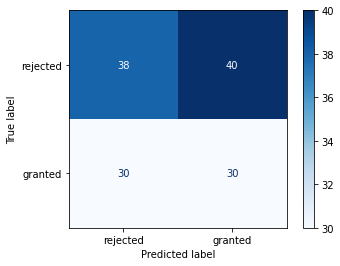

The average f1-micro average of the gnb classifier is:  0.8333333333333334
The average f1-macro average of the gnb classifier is:  0.8266994266994266
The classification report:
              precision    recall  f1-score   support

    rejected       0.82      0.91      0.86        78
     granted       0.86      0.73      0.79        60

    accuracy                           0.83       138
   macro avg       0.84      0.82      0.83       138
weighted avg       0.84      0.83      0.83       138



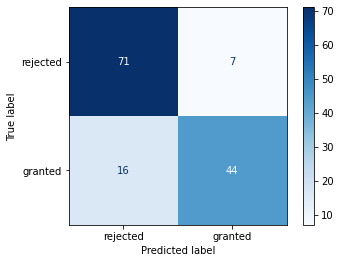

The average f1-micro average of the kNN classifier is:  0.7028985507246377
The average f1-macro average of the kNN classifier is:  0.6871094398053421
The classification report:
              precision    recall  f1-score   support

    rejected       0.70      0.82      0.76        78
     granted       0.70      0.55      0.62        60

    accuracy                           0.70       138
   macro avg       0.70      0.69      0.69       138
weighted avg       0.70      0.70      0.70       138



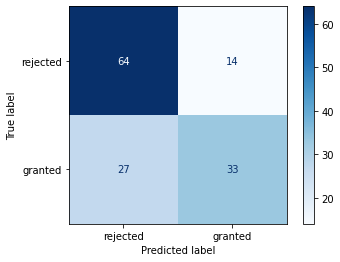

3


In [107]:
# dict that maps the classifier with its model
classifiers = {
    'dummy': dummy,
    'gnb': gnb,
    'kNN': knn

}

f1_scores_default = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers={}, my_classifiers=classifiers, est_values_mapper={}, cv=None, showResults=True)

Στη συνέχεια, έχοντας αποθηκεύσει τις τιμές των μετρικών F1-micro average και F1-macro average, τις αναπαριστούμε γραφικά:

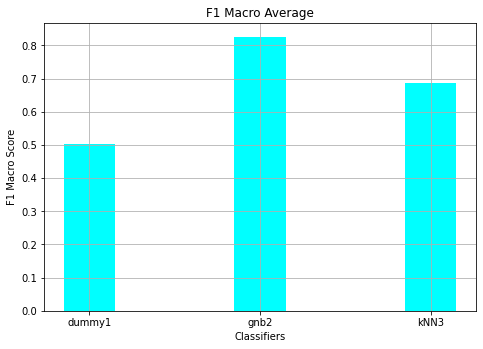

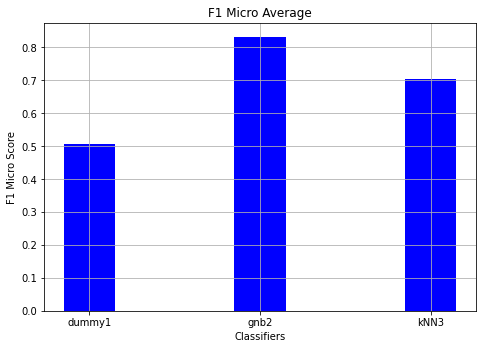

In [108]:
# plot for f1-macro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = f1_scores_default['macro'].keys()
f1_macro_scores = f1_scores_default['macro'].values()
ax.bar(clfs,f1_macro_scores, color='cyan', width=0.3)
plt.title("F1 Macro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Macro Score")
plt.grid()
plt.show()


# plot for f1-micro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = f1_scores_default['micro'].keys()
f1_macro_scores = f1_scores_default['micro'].values()
ax.bar(clfs,f1_macro_scores, color='b', width=0.3)
plt.title("F1 Micro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Micro Score")
plt.grid()
plt.show()


###Σχολιασμός αποτελεσμάτων

Για την απόδοση των τριών ταξινομητών στα δεδομένα εισόδου έχουμε στη διάθεσή μας τις μετρικές:

* **Precision**: Δηλώνει για κάθε κλάση την ακρίβεια των positive προβλέψεων, δηλαδή κατά πόσο ήταν θετικά αυτά που το μοντέλο δήλωσε ως θετικά. Προκύπτει από τον τύπο: **TP/ (TP + FP)**. Αν εφαρμόσουμε τον τύπο στα κατάλληλα δεδομένα των πινάκων σύγχυσης προκύπτουν οι τιμές που εφμανίζονται στο πεδίο  Precision του classification report για την αντίστοιχη κλάση. 


* **Recall**: Δηλώνει τι ποσοστό από τα positives για την κάθε κλάση προβλέψαμε σωστά. Προκύπτει από τον τύπο: TP /(TP + FN). Αν εφαρμόσουμε τον τύπο στα κατάλληλα δεδομένα των πινάκων σύγχυσης προκύπτουν οι τιμές που εφμανίζονται στο πεδίο  Recall του classification report για την αντίστοιχη κλάση. 


* **f1 -score**: Δηλώνει τι ποσοστό των θετικών προβλέψεων, για κάθε κλάση, ήταν σωστά. Προκύπτει από τον τύπο :

    F1 Score = 2*(Recall * Precision) / (Recall + Precision)    
και αν εφαρμόσουμε τις τιμές που προέκψαν προηγουμένως καταλήγουμε στα ίδια αποτελέσματα που υπάρχουν στo classification report, για την αντίστοιχη κλάση.

Μελετώντας τις τιμές για τους τρεις classifiers:

* Για τον **dummy**: Τα αποτελέσματα δεν ήταν ικανοποιητικά. Η μέθοδος που χρησιμοποιείται από default στον dummy classifier ονομάζεται "stratified" και για την αντιστοίχιση των κλάσεων λαμβάνει υπόψιν μόνο τη διατήρηση της ίδιας κατανομής των κλάσεων με αυτή στο train data. Σε κάθε επανάληψη του predict τα αποτελέσματα παρουσιάζουν μεταβολές, ωστόσο σε κάθε περίπτωση οι όλοι δείκτες κινούνται σε αναμενόμενες τιμές. Συγκεκριμένα, είναι λογικό να προβλέπει σταθερά περισσότερα *rejected*, δεδομένου ότι στο αρχικό dataset η κατανομή rejected-granted ήταν περίπου 55%- 45% και με ένα τυχαίο split η κατανομή στο train dataset θα είναι περίπου η ίδια. 

* Για τον **Naive Gaussain Bayes**: Συγκέτρωσε πολλά δείγματα στην κύρια διαγώνιο του confusion matrix.

* Για τον **k-NN**: Τα αποτελέσματά του ήταν καλύτερα από τον "dummy", αλλά χειρότερα από τον gnb. Σημείωσε μετριο precision και σχετικά καλό Recall για το rejected, αλλά κακό για το Granted. Μια πιθανή εξήγηση σε αυτό θα ήταν ότι μπορεί να υπάρχουν συγκεκριμένα κριτήρια απόρριψης για την πίστωση, οπότε τα διανύσματα των δειγμάτων θα ήταν κοντινά. Αντίθετα, για την έγκριση πίστωσης μπορεί να είναι περισσότεροι οι παράγοντες και τα διανύσματα των δειγμάτων πολύ διαφορετικά. Επομένως, με μεγαλύτερο k, μπορεί να είχαμε μεγαλύτερο Recall για την κλάση granted.

##Βελτιστοποίηση ταξινομητών

Ασχολούμαστε με τον κάθε ταξινομητή ξεχωριστά:

###Mετρική απόδοσης: **f1-macro**:

In [151]:
def getResults(scores, macros, test, test_labels):
    best_estimator = scores['best_estimator'][macros[0][0]]
    print("Best estimator is: ", best_estimator)
    # confusion matrix
    disp1 = plot_confusion_matrix(best_estimator, test, test_labels,
                                        display_labels=["rejected", "granted"],
                                        cmap=plt.cm.Blues)
    plt.show()

    # print macros
    print("The average f1-micro average is: ", scores['micro'][macros[0][0]])
    print("The average f1-macro average is: ", scores['macro'][macros[0][0]])
    print("Fit time: ", scores['fit_time'][macros[0][0]])
    print("Predict time: ", scores['predict_time'][macros[0][0]])

####Dummy Classifier


In [146]:
# dict that maps the transformer with its model
transformers = {'selector': selector,
         'scaler': scaler,
         'min_max_scaler': min_max_scaler,
         'ros': ros,
         'rus': rus,
         'pca': pca
        }

# dict that maps the transformer/classifier with the values of its arguments
est_values_mapper = {
    'selector': [0, 1000, 10000, 1000000],
    'pca': [10, 20, 30, 40, 50, 60],
    'dummy': ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified'],
    'kNN': [2, 5, 7, 9, 11]
}


f1_scores = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'dummy': dummy}, est_values_mapper)
macros = [(k,v) for k, v in sorted(f1_scores['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros)
getResults(f1_scores, macros, final_test, test_labels)

ValueError: ignored

Παρατηρούμε ότι με βάση τη μετρική απόδοσης f1-macro η βέλτιστη λύση που προτείνει ο εκτιμητής dummy Classifier είναι ΧΡΗΣΗ ΣΤΡΑΓΙΚΗΣ UNIFORM ΚΑΙ ΚΑΘΟΛΟΥ ΠΡΟΕΠΕΞΕΡΓΑΣΙΑ ΤΩΝ ΔΕΔΟΜΕΝΩΝ.


####Gaussian Naive Bayes Classifier


36
[('gnb20', 0.8417690417690418), ('gnb28', 0.8417690417690418), ('gnb1', 0.8266994266994266), ('gnb2', 0.8266994266994266), ('gnb3', 0.8266994266994266), ('gnb4', 0.8266994266994266), ('gnb5', 0.8266994266994266), ('gnb6', 0.8266994266994266), ('gnb7', 0.8266994266994266), ('gnb8', 0.8266994266994266), ('gnb9', 0.8266994266994266), ('gnb10', 0.8266994266994266), ('gnb11', 0.8266994266994266), ('gnb12', 0.8266994266994266), ('gnb19', 0.8266994266994266), ('gnb27', 0.8266994266994266), ('gnb32', 0.8048090523338048), ('gnb36', 0.8048090523338048), ('gnb16', 0.7961363636363636), ('gnb17', 0.7961363636363636), ('gnb18', 0.7961363636363636), ('gnb24', 0.7961363636363636), ('gnb25', 0.7961363636363636), ('gnb26', 0.7961363636363636), ('gnb31', 0.7961363636363636), ('gnb35', 0.7961363636363636), ('gnb13', 0.7580079494973112), ('gnb14', 0.7580079494973112), ('gnb15', 0.7580079494973112), ('gnb21', 0.7580079494973112), ('gnb22', 0.7580079494973112), ('gnb23', 0.7580079494973112), ('gnb29', 0.7

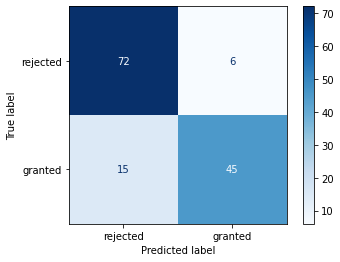

The average f1-micro average is:  0.8478260869565218
The average f1-macro average is:  0.8417690417690418
Fit time:  0.020142316818237305
Predict time:  0.0003712177276611328


In [111]:
f1_scores_gnb = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'gnb': gnb}, est_values_mapper)
macros_gnb = [(k,v) for k, v in sorted(f1_scores_gnb['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros_gnb)
getResults(f1_scores_gnb, macros_gnb, final_test, test_labels)

####k-Nearest Neighbors  Classifier


36
[('kNN35', 0.8389219015280136), ('kNN32', 0.8378205128205127), ('kNN36', 0.8378205128205127), ('kNN31', 0.8307651292988536), ('kNN16', 0.8293823576842445), ('kNN17', 0.8293823576842445), ('kNN18', 0.8293823576842445), ('kNN24', 0.8293823576842445), ('kNN25', 0.8293823576842445), ('kNN26', 0.8293823576842445), ('kNN29', 0.8293823576842445), ('kNN33', 0.8223557176571551), ('kNN13', 0.8196864111498257), ('kNN14', 0.8196864111498257), ('kNN15', 0.8196864111498257), ('kNN21', 0.8196864111498257), ('kNN22', 0.8196864111498257), ('kNN23', 0.8196864111498257), ('kNN30', 0.8136645962732919), ('kNN34', 0.8136645962732919), ('kNN1', 0.7309941520467838), ('kNN2', 0.7309941520467838), ('kNN3', 0.7309941520467838), ('kNN4', 0.7309941520467838), ('kNN5', 0.7309941520467838), ('kNN6', 0.7309941520467838), ('kNN7', 0.7309941520467838), ('kNN8', 0.7106918238993711), ('kNN9', 0.7106918238993711), ('kNN10', 0.7106918238993711), ('kNN11', 0.7106918238993711), ('kNN12', 0.7106918238993711), ('kNN28', 0.7

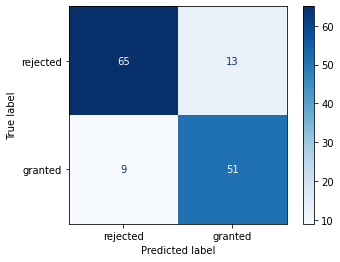

The average f1-micro average is:  0.8405797101449275
The average f1-macro average is:  0.8389219015280136
Fit time:  2.5705296993255615
Predict time:  0.10663938522338867


In [112]:
f1_scores_knn = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'kNN': knn}, est_values_mapper)
macros_knn = [(k,v) for k, v in sorted(f1_scores_knn['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros_knn)
getResults(f1_scores_knn, macros_knn, final_test, test_labels)

ΧΡΟΝΟΙ

In [113]:
def printRunTimes(dummy_scores, gnb_scores, knn_scores, dummy_metrics, gnb_metrics, knn_metrics):

    values = [[dummy_scores['fit_time'][dummy_metrics[0][0]], gnb_scores['fit_time'][gnb_metrics[0][0]], knn_scores['fit_time'][knn_metrics[0][0]]],
              [dummy_scores['predict_time'][dummy_metrics[0][0]], gnb_scores['predict_time'][gnb_metrics[0][0]], knn_scores['predict_time'][knn_metrics[0][0]]]]

    tmp = [sum(i) for i in np.array(values).T]

    values.append(tmp)

    cols = ['Dummy', 'GNB', 'KNN']
    df = pd.DataFrame(values, columns=cols, index=['Fit Time', 'Predict Time', 'Total Time'])
    print(df)


In [114]:
printRunTimes(f1_scores, f1_scores_gnb, f1_scores_knn, macros , macros_gnb, macros_knn)

                 Dummy       GNB       KNN
Fit Time      0.338426  0.020142  2.570530
Predict Time  0.000503  0.000371  0.106639
Total Time    0.338929  0.020514  2.677169


barplot for every classifier

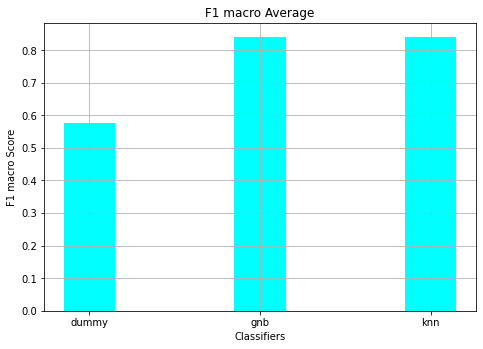

In [115]:
# plot for f1-macro average
def plotMetrics(dummy_scores, gnb_scores, knn_scores, dummy_metrics, gnb_metrics, knn_metrics, metric):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    clfs = ['dummy', 'gnb', 'knn']
    f1_macro_scores = [dummy_scores[metric][dummy_metrics[0][0]], gnb_scores[metric][gnb_metrics[0][0]], knn_scores[metric][knn_metrics[0][0]]]
    ax.bar(clfs,f1_macro_scores, color='cyan', width=0.3)
    plt.title("F1 "+metric+" Average")
    plt.xlabel("Classifiers")
    plt.ylabel("F1 "+metric+" Score")
    plt.grid()
    plt.show()

plotMetrics(f1_scores, f1_scores_gnb, f1_scores_knn, macros , macros_gnb, macros_knn, "macro")

μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.


In [116]:
# dummy
def printPerformanceProgress(dummy_scores, gnb_scores, knn_scores, dummy_metrics, gnb_metrics, knn_metrics, default_scores, metric):

    values = [
              [default_scores[metric]['dummy1'], default_scores[metric]['gnb2'], default_scores[metric]['kNN3']],
              [dummy_scores[metric][dummy_metrics[0][0]], gnb_scores[metric][gnb_metrics[0][0]], knn_scores[metric][knn_metrics[0][0]]]
              ]


    cols = ['Dummy', 'GNB', 'KNN']
    df = pd.DataFrame(values, columns=cols, index=['Default', 'Optimized'])
    print(df)



printPerformanceProgress(f1_scores, f1_scores_gnb, f1_scores_knn, macros , macros_gnb, macros_knn, f1_scores_default, 'macro')

              Dummy       GNB       KNN
Default    0.503492  0.826699  0.687109
Optimized  0.575340  0.841769  0.838922


###Μετρική απόδοσης **f1-micro**

####Dummy Classifier

36
[('dummy35', 0.5797101449275363), ('dummy2', 0.572463768115942), ('dummy23', 0.572463768115942), ('dummy1', 0.5652173913043478), ('dummy8', 0.5579710144927537), ('dummy33', 0.5507246376811594), ('dummy27', 0.5289855072463768), ('dummy3', 0.5217391304347826), ('dummy6', 0.5217391304347826), ('dummy7', 0.5217391304347826), ('dummy20', 0.5217391304347826), ('dummy29', 0.5217391304347826), ('dummy31', 0.5217391304347826), ('dummy4', 0.5144927536231884), ('dummy18', 0.5144927536231884), ('dummy13', 0.5072463768115942), ('dummy32', 0.5072463768115942), ('dummy11', 0.5), ('dummy17', 0.5), ('dummy21', 0.5), ('dummy36', 0.5), ('dummy19', 0.4855072463768116), ('dummy24', 0.4855072463768116), ('dummy14', 0.4782608695652174), ('dummy30', 0.4782608695652174), ('dummy34', 0.4782608695652174), ('dummy9', 0.47101449275362317), ('dummy25', 0.47101449275362317), ('dummy10', 0.463768115942029), ('dummy22', 0.463768115942029), ('dummy16', 0.45652173913043476), ('dummy26', 0.4492753623188406), ('dummy28

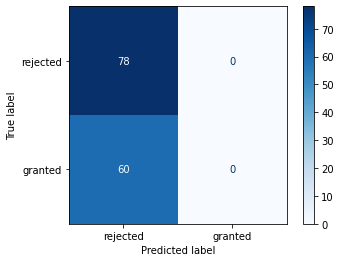

The average f1-micro average is:  0.5652173913043478
The average f1-macro average is:  0.3611111111111111
Fit time:  0.3118760585784912
Predict time:  0.0004239082336425781


In [117]:
f1_scores_micro = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'dummy': dummy}, est_values_mapper, scoring='f1_micro')
micros = [(k,v) for k, v in sorted(f1_scores['micro'].items(), key=lambda item: item[1], reverse=True)]
print(micros)
getResults(f1_scores_micro, micros, final_test, test_labels)

####Gaussian Naive Bayes Classifier


36
Best estimator is:  Pipeline(memory='tmp',
         steps=[('rus', RandomUnderSampler()), ('gnb', GaussianNB())])


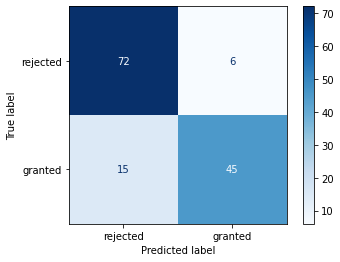

The average f1-micro average is:  0.8478260869565218
The average f1-macro average is:  0.8417690417690418
Fit time:  0.021397829055786133
Predict time:  0.0003223419189453125


In [118]:
f1_scores_gnb_micro = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'gnb': gnb}, est_values_mapper, scoring='f1_micro')
micros_gnb = [(k,v) for k, v in sorted(f1_scores_gnb['micro'].items(), key=lambda item: item[1], reverse=True)]
# print(micros_gnb)
getResults(f1_scores_gnb_micro, micros_gnb, final_test, test_labels)

####k-Nearest Neighbors  Classifier


36
Best estimator is:  Pipeline(memory='tmp',
         steps=[('min_max_scaler', MinMaxScaler()),
                ('rus', RandomUnderSampler()),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=7))])


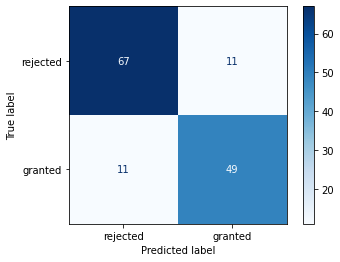

The average f1-micro average is:  0.8405797101449275
The average f1-macro average is:  0.8378205128205127
Fit time:  0.6712296009063721
Predict time:  0.10687708854675293


In [119]:
f1_scores_knn_micro = runEstimators(train=final_train, test=final_test, train_labels=train_labels, test_labels=test_labels, my_transformers=transformers, my_classifiers={'kNN': knn}, est_values_mapper, scoring='f1_micro')
micros_knn = [(k,v) for k, v in sorted(f1_scores_knn['micro'].items(), key=lambda item: item[1], reverse=True)]
# print(micros_knn)
getResults(f1_scores_knn_micro, micros_knn, final_test, test_labels)

In [120]:
printRunTimes(f1_scores_micro, f1_scores_gnb_micro, f1_scores_knn_micro, micros , micros_gnb, micros_knn)

                 Dummy       GNB       KNN
Fit Time      0.311876  0.021398  0.671230
Predict Time  0.000424  0.000322  0.106877
Total Time    0.312300  0.021720  0.778107


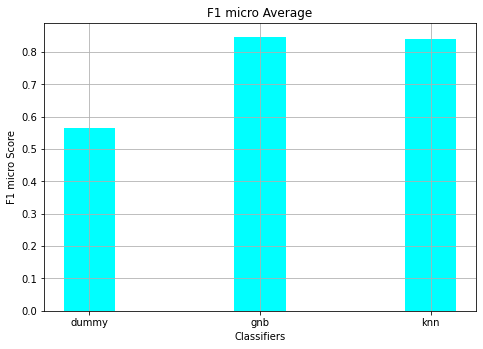

In [121]:
plotMetrics(f1_scores_micro, f1_scores_gnb_micro, f1_scores_knn_micro, micros , micros_gnb, micros_knn, "micro")

In [122]:
printPerformanceProgress(f1_scores_micro, f1_scores_gnb_micro, f1_scores_knn_micro, micros , micros_gnb, micros_knn, f1_scores_default, 'micro')

              Dummy       GNB       KNN
Default    0.507246  0.833333  0.702899
Optimized  0.565217  0.847826  0.840580


#Μεγάλο Dataset

Αρχικά κατεβάζουμε το συμπιεσμένο αρχείο, το αποθηκεύουμε ως data.zip και στη συνέχεια το αποσυμπιέζουμε, οπότε παράγονται 5 αρχείο τύπου .arff

In [124]:
download("http://archive.ics.uci.edu/ml/machine-learning-databases/00365/data.zip", 'data.zip')
!unzip data.zip

Archive:  data.zip
replace 1year.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Για να μετατρέψουμε τα αρχεία σε .csv, αρκεί να κρατήσουμε μόνο τις γραμμές που δεν ξεκινάνε με “%”, “@” και δεν είναι κενές.
Επομένως, για καθένα από τα .arff αρχεία εκτελούμε την εντολή:
```
cat ${file} | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" >> data.csv
```
Η εντολή αυτή θα τυπώσει μόνο τις επιθυμητές γραμμές και θα ανακατευθύνει το αποτέλεσμα στο αρχείο data.csv, προσθέτοντάς το στο τέλος του.

Για να πραγματοποιήσουμε αυτήν τη διαδικασία για όλα τα .arff εκτελούμε τα παρακάτω:

In [125]:
%%shell
truncate -s 0 data.csv  #create or empty the data.csv file
for file in ./*.arff    #for every .arff file in the current directory
do
    echo ${file}        #print file name for checking the progress purposes
    cat ${file} | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" >> data.csv  #print the lines with the samples in the end of data.csv file
done
wc -l data.csv          #check the length of the final file

./1year.arff
./2year.arff
./3year.arff
./4year.arff
./5year.arff
43405 data.csv


In [126]:
import pandas as pd

big_df = pd.read_csv("data.csv", header=None)
# print df
big_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,593.27,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,?,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,?,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,?,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,2.3019,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,?,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,?,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,11.247,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,0.041583,0.061959,0.023622,0.013981,6507.6,0.056089,1.416,0.013981,0.008338,27.092,1.033,0.040401,0.007692,0.90184,0.083706,0.054556,1.4637,0.052831,4.9667,0.41853,0.024762,50.128,7.4,2.3644,0.033819,1.6768,0.3785,0.66377,0.020169,0.022858,0.35651,0.024093,56.452,29.36,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.1,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,-0.57805,-0.60216,-0.11022,-0.57805,-742.28,-0.49173,1.0341,-0.57805,-0.13399,3.2965,0.6477,-0.53492,-0.13399,-0.57805,-0.39004,-0.49173,?,-0.9524,4.0622,0.21864,-0.13399,76.33,4.7819,-0.55316,-0.53492,4.3912,17.036,-0.38299,-0.12399,0.024771,-0.073529,-0.12399,11.451,8.1548,-14.836,0.12517,3.098,-0.63746,-0.14776,0.16455,0.95997,0.20912,-0.46385,-0.45546,-9242.1,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,-0.15493,-0.14284,-0.07294,-0.15493,-3298.2,-0.11067,

##Βασικές Πληροφορίες

###Πληροφορίες dataset
Το dataset, πρόκειται επομένως για ένα σύνολο **43405 δειγμάτων**, με κάθε δείγμα να έχει **64 χαρακτηριστικά**. Η τελευταία στήλη είναι η κλάση στην οποία ανήκει το δείγμα, δηλαδή δηλώνει αν πτώχευσε (1) ή όχι (0) η συγκεκριμένη εταιρεία.

Πιο συγκεκριμένα, το dataset *Polish companies bankruptcy* αποτελεί ένα σύνολο δεδομένων σχετικά με πολωνικές εταιρείες που πτώχευσαν ή όχι παραθέτοντας αρκετά (64) χαρακτηριστικά τους. Τα στοιχεία έχουν συλλεγεί ως 5 διαφορετικά σύνολα που το καθένα αντιστοιχεί σε 5 διαφορετικά έτη. Παρολαυτά στα πλαίσια της παρούσας εργασίας τα 5 σύνολα δεδομένων θα αντιμετωπιστούν ως ένα ενιαίο σύνολο δεδομένων.

Παρακάτω παρατίθεται μία σύντομη περιγραφή του καθενός από τα χαρακτηριστικά των δειγμάτων που υπάρχουν στο dataset:

| Attribute | Description                                                                                                         |
|-----------|---------------------------------------------------------------------------------------------------------------------|
| X1        | net profit / total assets                                                                                           |
| X2        | total liabilities / total assets                                                                                    |
| X3        | working capital / total assets                                                                                      |
| X4        | current assets / short-term liabilities                                                                             |
| X5        | [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 |
| X6        | retained earnings / total assets                                                                                    |
| X7        | EBIT / total assets                                                                                                 |
| X8        | book value of equity / total liabilities                                                                            |
| X9        | sales / total assets                                                                                                |
| X10       | equity / total assets                                                                                               |
| X11       | (gross profit + extraordinary items + financial expenses) / total assets                                            |
| X12       | gross profit / short-term liabilities                                                                               |
| X13       | (gross profit + depreciation) / sales                                                                               |
| X14       | (gross profit + interest) / total assets                                                                            |
| X15       | (total liabilities * 365) / (gross profit + depreciation)                                                           |
| X16       | (gross profit + depreciation) / total liabilities                                                                   |
| X17       | total assets / total liabilities                                                                                    |
| X18       | gross profit / total assets                                                                                         |
| X19       | gross profit / sales                                                                                                |
| X20       | (inventory * 365) / sales                                                                                           |
| X21       | sales (n) / sales (n-1)                                                                                             |
| X22       | profit on operating activities / total assets                                                                       |
| X23       | net profit / sales                                                                                                  |
| X24       | gross profit (in 3 years) / total assets                                                                            |
| X25       | (equity - share capital) / total assets                                                                             |
| X26       | (net profit + depreciation) / total liabilities                                                                     |
| X27       | profit on operating activities / financial expenses                                                                 |
| X28       | working capital / fixed assets                                                                                      |
| X29       | logarithm of total assets                                                                                           |
| X30       | (total liabilities - cash) / sales                                                                                  |
| X31       | (gross profit + interest) / sales                                                                                   |
| X32       | (current liabilities * 365) / cost of products sold                                                                 |
| X33       | operating expenses / short-term liabilities                                                                         |
| X34       | operating expenses / total liabilities                                                                              |
| X35       | profit on sales / total assets                                                                                      |
| X36       | total sales / total assets                                                                                          |
| X37       | (current assets - inventories) / long-term liabilities                                                              |
| X38       | constant capital / total assets                                                                                     |
| X39       | profit on sales / sales                                                                                             |
| X40       | (current assets - inventory - receivables) / short-term liabilities                                                 |
| X41       | total liabilities / ((profit on operating activities + depreciation) * (12/365))                                    |
| X42       | profit on operating activities / sales                                                                              |
| X43       | rotation receivables + inventory turnover in days                                                                   |
| X44       | (receivables * 365) / sales                                                                                         |
| X45       | net profit / inventory                                                                                              |
| X46       | (current assets - inventory) / short-term liabilities                                                               |
| X47       | (inventory * 365) / cost of products sold                                                                           |
| X48       | EBITDA (profit on operating activities - depreciation) / total assets                                               |
| X49       | EBITDA (profit on operating activities - depreciation) / sales                                                      |
| X50       | current assets / total liabilities                                                                                  |
| X51       | short-term liabilities / total assets                                                                               |
| X52       | (short-term liabilities * 365) / cost of products sold)                                                             |
| X53       | equity / fixed assets                                                                                               |
| X54       | constant capital / fixed assets                                                                                     |
| X55       | working capital                                                                                                     |
| X56       | (sales - cost of products sold) / sales                                                                             |
| X57       | (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)                       |
| X58       | total costs /total sales                                                                                            |
| X59       | long-term liabilities / equity                                                                                      |
| X60       | sales / inventory                                                                                                   |
| X61       | sales / receivables                                                                                                 |
| X62       | (short-term liabilities *365) / sales                                                                               |
| X63       | sales / short-term liabilities                                                                                      |
| X64       | sales / fixed assets                                                                                                |

###Περιγραφή χαρακτηριστικών του dataset

Όπως είδαμε και προηγουμένως το σύνολο περιλαμβάνει **43405 δείγματα**, με κάθε δείγμα να έχει **64 χαρακτηριστικά**. **Όλα τα χαρακτηριστικά παίρνουν αριθμητικές, μη διατεταγμένες τιμές**.

Επίσης, το dataset **δεν** περιλαμβάνει επικεφαλίδες και αρίθμηση γραμμών.

Οι ετικέτες των κλάσεων, χρεωκοπεία ή όχι, **αναπαριστόνται με τιμές 1 και 0 αντίστοιχα και βρίσκονται στην τελευταία στήλη**.

Οι μοναδικές αλλαγές των αρχικών αρχείων .arff που χρειάστηκε να γίνουν είναι η μετατροπή τους σε αρχεία .csv, που έγινε με όπως περιγράφηκε παραπάνω. Τέλος, τα δεδομένα από τα 5 συνολικά αρχεία συγκεντρώθηκαν σε ένα μόνο αρχείο, το **data.csv**, όπως περιγράφηκε παραπάνω.

###Εντοπισμός απουσιάζουσων τιμών χαρακτηριστικών

Στη συνέχεια, θα εντοπίσουμε τις απουσιάζουσες τιμές. Αυτές δηλώνονται στο dataset με τον χαρακτήρα "?".

In [127]:
import numpy as np
from sklearn.impute import SimpleImputer

# replace "?" with np.NaN
big_df.replace('?',np.NaN,inplace=True)

# calculate the number of samples with at least one missing attribute
# big_df.isna() is the mask of big_df where each element is True if is NaN
# num_of_incomplete_samples_big is the length of the list of samples that have at least one True(NaN)
num_of_incomplete_samples_big = len([i for i in np.array(big_df.isna()) if True in i])

print("The samples of the dataset that have at least one missing attribute are ", num_of_incomplete_samples_big)
print("Which means that the ", num_of_incomplete_samples_big*100/big_df.shape[0], "% of the samples have missing values.", sep="")

The samples of the dataset that have at least one missing attribute are  23438
Which means that the 53.99838728257113% of the samples have missing values.


Σύμφωνα με τα αποτελέσματα, το **53.99% των δειγμάτων έχουν απουσιάζουσες τιμές**.

Βλέπουμε, λοιπόν ότι ένα πολύ μεγάλο ποσοστό των δειγμάτων έχουν τουλάχιστον μία απουσιάζουσα τιμή, επομένως η διαγραφή των δειγμάτων με απουσιάζουσες τιμές είναι απαγορευτική.

Στη συνέχεια, θα ελέγξουμε πόσες απουσιάζουσες τιμές έχει το κάθε χαρακτηριστικό:

In [128]:
# the list of the number of missing values for each attribute occurs by 
# summing the elements of the inverse of df, without df's last column.
# df's last column is the class attribute and it is alwasy present.
incomplete_attrs_big = [sum(i) for i in np.array(big_df.isna())[:,:big_df.shape[1]-1].T]
print("For each attribute of the dataset, the number of the missing values is")
print(incomplete_attrs_big)

For each attribute of the dataset, the number of the missing values is
[8, 8, 8, 134, 89, 8, 8, 94, 9, 8, 44, 134, 127, 8, 36, 95, 94, 8, 128, 127, 5854, 8, 127, 922, 8, 95, 2764, 812, 8, 127, 127, 368, 134, 94, 8, 8, 18984, 8, 127, 134, 754, 127, 127, 127, 2147, 135, 297, 9, 127, 94, 8, 301, 812, 812, 1, 127, 7, 84, 7, 2152, 102, 127, 134, 812]


In [129]:
# list of all attributes with more than 30% of their values missing
incomplete_attributes = [i for i, x in enumerate(incomplete_attrs_big) if x/big_df.shape[0] > 0.3]
print(incomplete_attributes)

for x in incomplete_attributes:
    print(incomplete_attrs_big[x]*100/big_df.shape[0], "%")
# print(incomplete_attrs_big[incomplete_attribute]*100/big_df.shape[0], "%")

[36]
43.73689667089045 %


Παρατηρούμε ότι το 43.7% των τιμών του χαρακτηριστικού 37ου (η αρίθμηση ξεκινάει από το 0) απουσιάζει. Με βάση αυτήν την παρατήρηση θα ήταν μαλλον καλύτερο να διαγραφεί εντελώς αυτή η στήλη ώστε να μην επηρεάσει αρνητικά.



In [130]:
big_df = big_df.drop(big_df.columns[[incomplete_attributes[0]]], axis=1)
big_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,0.24976,0.6598,0.1666,0.24976,497.42,0.73378,2.6349,0.24976,0.14942,43.37,1.2479,0.21402,0.11998,0.47706,0.50494,0.60411,1.4582,1.7615,5.9443,0.11788,0.14942,94.14,3.8772,0.56393,0.21402,1.741,0.50591,0.12804,0.66295,0.051402,0.12804,114.42,71.05,1.0097,1.5225,49.394,0.1853,0.11085,2.042,0.37854,0.25792,2.2437,2.248,348690,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,0.26114,0.5168,0.15835,0.25834,677.96,0.53838,2.0005,0.25834,0.152,87.981,1.4293,0.24806,0.12304,NaN,0.39542,0.43992,88.444,16.946,3.6884,0.26969,0.152,122.17,2.9876,2.9876,0.20616,1.6996,0.49788,0.1213,0.086422,0.064371,0.14595,199.49,111.51,0.51045,1.1252,100.13,0.23727,0.13961,1.9447,0.49988,0.33472,17.866,17.866,2304.6,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,0.31258,0.64184,0.24435,0.30906,794.16,0.45961,1.4369,0.30906,0.2361,73.133,1.4283,0.3026,0.18996,NaN,0.28932,0.37282,86.011,1.0627,4.3749,0.41929,0.23815,176.93,2.063,1.4274,0.31565,1.309,0.51537,0.24114,0.32202,0.07402,0.23117,165.51,92.381,0.94807,1.0101,96.372,0.29181,0.22293,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.1155,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.1155,1.3562,0.57353,0.088995,0.40139,0.069622,0.088995,180.77,100.98,0.2872,1.5696,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,0.18732,0.33147,0.12182,0.18732,1133.2,0.32211,1.6307,0.18732,0.11553,57.045,NaN,0.19832,0.11553,0.18732,0.38677,0.32211,1.4138,1.1184,4.1424,0.27884,0.11553,147.04,2.4823,0.3234,0.19832,1.6278,0.43489,0.12231,0.29304,0.09668,0.12231,141.62,84.574,0.73919,0.95787,65.936,0.18811,0.11601,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.1722,-18.907,0,0.013981,0.416,1.6768,0.29379,0.041583,0.061959,0.023622,0.013981,6507.6,0.056089,1.416,0.013981,0.008338,27.092,1.033,0.040401,0.007692,0.90184,0.083706,0.054556,1.4637,0.052831,4.9667,0.41853,0.024762,50.128,7.4,2.3644,0.033819,1.6768,0.66377,0.020169,0.022858,0.35651,0.024093,56.452,29.36,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.1,0.020169,0.043904,1.0122,1.2594,13.472,12.432,49.117,7.4313,2.2799,1
43401,-0.57805,0.96702,-0.80085,0.16576,-67.365,-0.57805,-0.57805,-0.40334,0.93979,-0.39004,-0.57805,-0.60216,-0.11022,-0.57805,-742.28,-0.49173,1.0341,-0.57805,-0.13399,3.2965,0.6477,-0.53492,-0.13399,-0.57805,-0.39004,-0.49173,NaN,-0.9524,4.0622,0.21864,-0.13399,76.33,4.7819,-0.55316,-0.53492,4.3912,-0.38299,-0.12399,0.024771,-0.073529,-0.12399,11.451,8.1548,-14.836,0.12517,3.098,-0.63746,-0.14776,0.16455,0.95997,0.20912,-0.46385,-0.45546,-9242.1,-0.064073,1.482,1.0641,-0.018084,110.72,44.759,81.22,4.494,5.1305,1
43402,-0.17905,1.2553,-0.27599,0.74554,-120.44,-0.17905,-0.15493,-0.26018,1.1749,-0.32659,-0.15493,-0.14284,-0.07294,-0.15493,-3298.2,-0.11067,0.79665,-0.15493,-0.08135,37.046,0.831

Για τις υπόλοιπες τιμές, θα αντικαταστήσουμε κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή. Αυτό θα γίνει μετά τον διαχωρισμό του dataset σε train και test και πριν την έναρξη του Cross Validation.

###Κατανομή των κλάσεων

Στη συνέχεια, θα εξετάσουμε τι κατανομή έχουν οι δύο κλάσεις στα δεδομένα:

In [131]:
num_of_rows = big_df.shape[0]
num_of_attrs = big_df.shape[1] - 1 #remove one element because of the class attribute

# get labesl and features
labels_df = big_df.iloc[:, [num_of_attrs]] # τα labels είναι στην τελευταία κολώνα
features_df = big_df.iloc[:, 0:num_of_attrs]  # τα features είναι όλες οι προηγούμενες κολώνες

labels = labels_df.values.reshape(num_of_rows,)
features = features_df.values
# convert to int
labels.astype(int)
labels = np.array(labels, dtype='int64')


# find how many of each class
bin_count = np.bincount(labels)
print ("bincount:", bin_count)
print(sum(bin_count))
print("The percentage of 0's in data: ", bin_count[0]*100/sum(bin_count), "%.")
print("The percentage of 1's in data: ", bin_count[1]*100/sum(bin_count), "%.")

bincount: [41314  2091]
43405
The percentage of 0's in data:  95.18258265176823 %.
The percentage of 1's in data:  4.81741734823177 %.


Παρατηρούμε ότι το **95%** των δειγμάτων ανήκουν στην κλάση **0**, ενώ μόλις το **4.81%** στην κλάση **1**. Επομένως, **το dataset είναι εντελώς ανισόρροπο**.

###Διαχωρισμός του dataset
Διαχωρίζουμε το dataset σε train και test set, χρησιμοποιώντας το 70% των δεδομένων για το training και το 30% για το testing:

In [147]:
from sklearn.model_selection import train_test_split


train, test, big_train_labels, big_test_labels = train_test_split(features, labels, test_size=0.3)

In [133]:
train_pd = pd.DataFrame(data=train[:,:],    # values
                 index=train[:,0])    # 1st column as index
                  
test_pd = pd.DataFrame(data=test[:,:],    # values
                 index=test[:,0])    # 1st column as index

In [134]:
print(train.shape)
print(train_pd.shape)

print(test.shape)
print(test_pd.shape)

(30383, 63)
(30383, 63)
(13022, 63)
(13022, 63)


##Ταξινόμηση

Θα χρησιμποιηθούν οι ίδιες συναρτήσεις που χρησιμοποιήθηκαν στο μικρό Dataset, αφού το μόνο που αρκεί είναι η κλήση τους με τις κατάλληλες παραμέτρους.

Αρχικά, όμως θα αντικαταστήσουμε τις απουσιάζουσες με τον μέσο όρο των τιμών στο αντίστοιχο χαρακτηριστικό:

In [135]:
from sklearn.impute import SimpleImputer

# create imputer that will replace NaN with the most frequent value
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")
# fit and transform train data by replacing NaN with the most frequent value of the attribute
big_train=pd.DataFrame(imp.fit_transform(train_pd))
big_train.columns=train_pd.columns
big_train.index=train_pd.index

# transform the test data using the same model
big_test = imp.transform(test_pd.values)

Κατηγορικές μεταβλητές δεν υπάρχουν στο dataset, επομένως μπορούμε να εισάγουμε τα δεδομένα στο Pipeline και να δοκιμάσουμε τους διάφορους ταξινομητές που προκύπτουν.

###Baseline Classification - Ταξινόμηση χωρίς προεπεξεργασία

The average f1-micro average of the dummy classifier is:  0.9107663953309784
The average f1-macro average of the dummy classifier is:  0.5095307800020745
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      0.95      0.95     12415
     granted       0.06      0.07      0.07       607

    accuracy                           0.91     13022
   macro avg       0.51      0.51      0.51     13022
weighted avg       0.91      0.91      0.91     13022



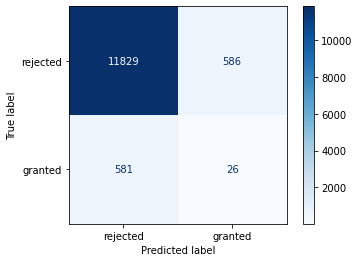

The average f1-micro average of the gnb classifier is:  0.06404546152664721
The average f1-macro average of the gnb classifier is:  0.06340697259604985
The classification report:
              precision    recall  f1-score   support

    rejected       0.93      0.02      0.04     12415
     granted       0.05      0.97      0.09       607

    accuracy                           0.06     13022
   macro avg       0.49      0.49      0.06     13022
weighted avg       0.88      0.06      0.04     13022



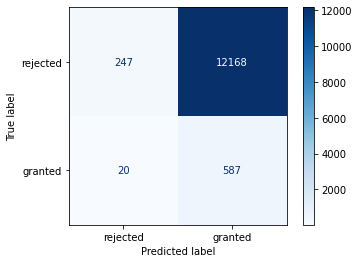

The average f1-micro average of the kNN classifier is:  0.9526954384887114
The average f1-macro average of the kNN classifier is:  0.4895045384575633
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      1.00      0.98     12415
     granted       0.09      0.00      0.00       607

    accuracy                           0.95     13022
   macro avg       0.52      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022



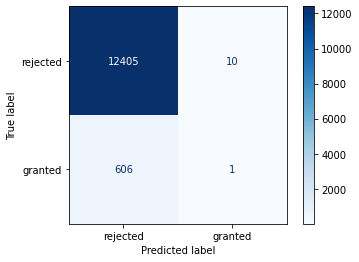

The average f1-micro average of the mlp classifier is:  0.9416372293042543
The average f1-macro average of the mlp classifier is:  0.49652814872379986
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      0.99      0.97     12415
     granted       0.05      0.01      0.02       607

    accuracy                           0.94     13022
   macro avg       0.50      0.50      0.50     13022
weighted avg       0.91      0.94      0.93     13022



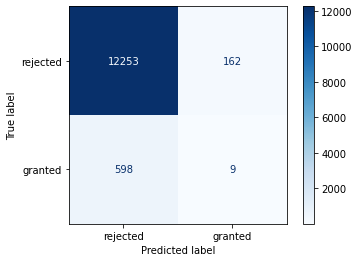

The average f1-micro average of the svm classifier is:  0.95338657656274
The average f1-macro average of the svm classifier is:  0.4880685615442073
The classification report:
              precision    recall  f1-score   support

    rejected       0.95      1.00      0.98     12415
     granted       0.00      0.00      0.00       607

    accuracy                           0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022



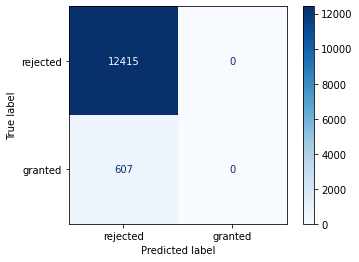

5


In [148]:
classifiers = {
    'dummy': dummy,
    'gnb': gnb,
    'kNN': knn,
    'mlp': mlp,
    'svm': svc

}

f1_scores_default = runEstimators(big_train, big_test, big_train_labels, big_test_labels, my_transformers={}, my_classifiers=classifiers, cv=None, showResults=True)

####Σχολιασμός αποτελεσμάτων

Για την μελέτη των αποτελεσμάτων έχουν τυπωθεί οι τιμές f1-micro average και f1-macro average, τα classification reports και οι πίνακες σύγχυσης.
Η εξήγηση των παραπάνω έχει γίνει στην μελέτη του μικρού dataset, οπότε ακολουθεί η ερμηνεία τους.

Μελετώντας τα παραπάνω classification reports μπορούμε να βγάλουμε ορισμένα συμπεράσματα, αλλά και να καταλήξουμε αν τα αποτελέσματα από το train των classifiers με τις default τους τιμές είναι αναμενόμενο.

* Για τον **Dummy Classifier**: Έχει χρησιμοποιηθεί η deafult στρατηγική του, δηλαδή η *stratified*, η οποία ταξινομεί το κάθε δείγμα ανεξάρτητα από τα χαρακτηριστικά του, λαμβάνοντας μόνον υπόψιν να διατηρείται σταθερή η κατανομή των κλάσεων και να είναι ίδια με αυτή στα train data. Όπως ήταν αναμενόμενο, και όπως φαίνεται και από τους πίνακες σύγχυσης, ο ταξινομητής έχει ταξινομήσει στην κλάση 0 (μη πτώχευση) 12415 δείγματα, δηλαδή το 95.3% των συνολικών δειγμάτων, ακριβώς όσο ήταν και η κατανομή 0 και 1 στο training data. Ακριβώς επειδή έχουν ταξινομηθεί τα περισσότερα δείγματα στην κλάση 0 και επειδή όντως τα περισσότερα ανήκαν σε αυτήν οι τιμές των **Precision** (κατά πόσο ήταν θετικά αυτά που το μοντέλο δήλωσε ως θετικά), **Recall** (ποσοστό από τα positives για την κάθε κλάση προβλέψαμε σωστά) και **f1 score** (ποσοστό των θετικών προβλέψεων που ήταν σωστά) είναι πολύ κοντά στη μονάδα. Παρόλα αυτά το ίδια δεν ισχύει καθόλου για τις παραπάνω τιμές της κλάσης 1.

* Για τον **Gaussian Naive Bayes Classifier**: Παρατηρούμε ότι ταξινομεί τη συντριπτική πλειοψηφία των δειγμάτων στην κλάση 1.

* Για τον **k_Nearest Neighbors Classifier**, όπου η default τιμή για την υπερπαράμετρο k είναι k=5, παρατηρούμε

In [ ]:
# plot for f1-macro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = f1_scores_default['macro'].keys()
f1_macro_scores = f1_scores_default['macro'].values()
ax.bar(clfs,f1_macro_scores, color='cyan', width=0.3)
plt.title("F1 Macro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Macro Score")
plt.grid()
plt.show()


# plot for f1-micro average
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clfs = f1_scores_default['micro'].keys()
f1_macro_scores = f1_scores_default['micro'].values()
ax.bar(clfs,f1_macro_scores, color='b', width=0.3)
plt.title("F1 Micro Average")
plt.xlabel("Classifiers")
plt.ylabel("F1 Micro Score")
plt.grid()
plt.show()


##Βελτιστοποίηση ταξινομητών

Εκτελούμε τις παρακάτω εντολές για να βρούμε τη διακύμανση στις τιμές των διαφόρων χαρακτηριστικών:

In [ ]:
# train_variance = i_train.var(axis=0)
# print(train_variance)
# print(np.max(train_variance))
# print(train_variance.shape)

###Μετρική απόδοσης f1-macro

####Dummy

In [169]:
# dict that maps the transformer/classifier with the values of its arguments
est_values_mapper = {
    'selector': [0, 5, 10],
    'pca': [5, 10, 20, 30],
    'dummy': ['uniform', 'constant_0', 'constant_1', 'most_frequent', 'stratified'],
    'kNN': [2, 5, 7, 9, 11]
}

In [149]:
transformers = {
    'selector': selector,
    'scaler': scaler,
    'min_max_scaler': min_max_scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}


big_scores_dummy = runEstimators(big_train, big_test, big_train_labels, big_test_labels, my_transformers=transformers, my_classifiers={'dummy':dummy}, est_values_mapper, cv=5, scoring='f1_macro')

36


[('dummy5', 0.5055273138061809), ('dummy15', 0.5052585760716483), ('dummy6', 0.5036215122912561), ('dummy13', 0.503015638100314), ('dummy14', 0.5027331101665857), ('dummy23', 0.502270335245429), ('dummy18', 0.5020437407739506), ('dummy21', 0.501309674639549), ('dummy8', 0.500855787670093), ('dummy10', 0.5007739287105567), ('dummy4', 0.5003936948286063), ('dummy22', 0.5000829848486729), ('dummy16', 0.49984085689434177), ('dummy24', 0.49928087525426557), ('dummy11', 0.49876362174811734), ('dummy25', 0.49837189646303853), ('dummy2', 0.49758429490314326), ('dummy3', 0.49748126159554734), ('dummy7', 0.4967922515368803), ('dummy26', 0.495621096620613), ('dummy1', 0.49476910522976947), ('dummy9', 0.494333387823), ('dummy12', 0.49351333070149106), ('dummy17', 0.4900490991286643), ('dummy19', 0.48760525694499096), ('dummy20', 0.48760525694499096), ('dummy27', 0.48760525694499096), ('dummy28', 0.48760525694499096), ('dummy29', 0.48760525694499096), ('dummy30', 0.48760525694499096), ('dummy31', 0

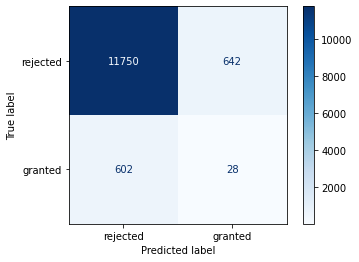

The average f1-micro average is:  0.9090769467055752
The average f1-macro average is:  0.5055273138061809
Fit time:  0.28460073471069336
Predict time:  0.0006792545318603516


In [152]:
macros = [(k,v) for k, v in sorted(big_scores_dummy['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros)
getResults(big_scores_dummy, macros, big_test, big_test_labels)

####Gaussian Naive Bayes Classifier

36
[('gnb32', 0.5101961485897237), ('gnb30', 0.07932211724887202), ('gnb34', 0.07932211724887202), ('gnb28', 0.07567244174687819), ('gnb13', 0.07267831247726618), ('gnb14', 0.07267831247726618), ('gnb15', 0.07267831247726618), ('gnb21', 0.07267831247726618), ('gnb22', 0.07267831247726618), ('gnb23', 0.07267831247726618), ('gnb29', 0.07267831247726618), ('gnb33', 0.07267831247726618), ('gnb31', 0.07219875111958952), ('gnb35', 0.07219875111958952), ('gnb16', 0.07195881539495878), ('gnb17', 0.07195881539495878), ('gnb18', 0.07195881539495878), ('gnb24', 0.07195881539495878), ('gnb25', 0.07195881539495878), ('gnb26', 0.07195881539495878), ('gnb36', 0.06858881455738847), ('gnb19', 0.06704983895409451), ('gnb1', 0.06616115258956504), ('gnb2', 0.06616115258956504), ('gnb3', 0.06616115258956504), ('gnb4', 0.06616115258956504), ('gnb5', 0.06616115258956504), ('gnb6', 0.06616115258956504), ('gnb7', 0.06616115258956504), ('gnb8', 0.06616115258956504), ('gnb9', 0.06616115258956504), ('gnb10', 0.06

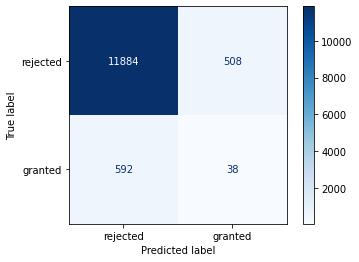

The average f1-micro average is:  0.9155275687298418
The average f1-macro average is:  0.5101961485897237
Fit time:  0.5703024864196777
Predict time:  0.010185480117797852


In [163]:
big_scores_gnb = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'gnb':gnb}, 
                               est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')
macros = [(k,v) for k, v in sorted(big_scores_gnb['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros)
getResults(big_scores_gnb, macros, big_test, big_test_labels)

####k_Nearest Neighbors Classifier

36
[('kNN31', 0.5046725312133965), ('kNN35', 0.5046725312133965), ('kNN33', 0.5024701234494815), ('kNN29', 0.4974399162426857), ('kNN16', 0.4916091785195922), ('kNN17', 0.4916091785195922), ('kNN18', 0.4916091785195922), ('kNN1', 0.4905822355793102), ('kNN2', 0.4905822355793102), ('kNN3', 0.4905822355793102), ('kNN4', 0.4905822355793102), ('kNN5', 0.4905822355793102), ('kNN6', 0.4905822355793102), ('kNN7', 0.4905822355793102), ('kNN8', 0.4905822355793102), ('kNN9', 0.4905822355793102), ('kNN10', 0.4905822355793102), ('kNN11', 0.4905822355793102), ('kNN12', 0.4905822355793102), ('kNN19', 0.4891099812699524), ('kNN27', 0.4891099812699524), ('kNN13', 0.4890506697872322), ('kNN14', 0.4890506697872322), ('kNN15', 0.4890506697872322), ('kNN21', 0.4889828077475341), ('kNN22', 0.4889828077475341), ('kNN23', 0.4889828077475341), ('kNN24', 0.4887118905946524), ('kNN25', 0.4887118905946524), ('kNN26', 0.4887118905946524), ('kNN28', 0.4584412372988041), ('kNN30', 0.45838583287261603), ('kNN34', 0.

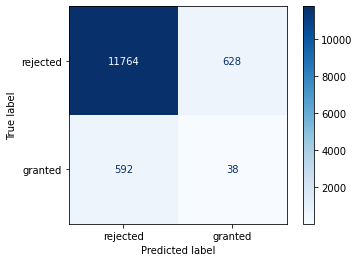

The average f1-micro average is:  0.9063123944094609
The average f1-macro average is:  0.5046725312133965
Fit time:  134.3434772491455
Predict time:  14.896512746810913


In [164]:
big_scores_knn = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'kNN':knn}, 
                               est_values_mapper=est_values_mapper, cv=5, scoring='f1_macro')
macros = [(k,v) for k, v in sorted(big_scores_knn['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros)
getResults(big_scores_knn, macros, big_test, big_test_labels)

Βλέπουμε ότι ο καλύτερος ταξινομητής προέκυψυε με κανονικοποιήση Min-Max, RandomOverSampling και παράμετρο k του ταξινομητή kNN k=2. Ωστόσο, η παράμετρος αυτή ήταν η ελάχιστη που έχουμε θέσει στο σύνολο των τιμών της παράμετρου k για δοκιμή στο Cross Validation. Επομένως, θα ξανατρέξουμε τη συνάρτηση για τις τιμές: k = [1,2,3,4]. 

Αυτό θα μας κοστίσει χρονικά, ωστόσο θα επιλέξουμε με σιγουριά την καλύτερη δυνατή τιμή για το k.

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.4s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.5s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.0s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.5s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.6s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.5min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.2s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.9min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.0min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   38.0s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.0min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.3min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.4s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.1s finished


36
[('kNN31', 0.5046725312133965), ('kNN35', 0.5046725312133965), ('kNN33', 0.5024701234494815), ('kNN29', 0.4974399162426857), ('kNN16', 0.4916091785195922), ('kNN17', 0.4916091785195922), ('kNN18', 0.4916091785195922), ('kNN1', 0.4905822355793102), ('kNN2', 0.4905822355793102), ('kNN3', 0.4905822355793102), ('kNN4', 0.4905822355793102), ('kNN5', 0.4905822355793102), ('kNN6', 0.4905822355793102), ('kNN7', 0.4905822355793102), ('kNN8', 0.4905822355793102), ('kNN9', 0.4905822355793102), ('kNN10', 0.4905822355793102), ('kNN11', 0.4905822355793102), ('kNN12', 0.4905822355793102), ('kNN19', 0.4891099812699524), ('kNN27', 0.4891099812699524), ('kNN13', 0.4890506697872322), ('kNN14', 0.4890506697872322), ('kNN15', 0.4890506697872322), ('kNN21', 0.4889828077475341), ('kNN22', 0.4889828077475341), ('kNN23', 0.4889828077475341), ('kNN24', 0.4887118905946524), ('kNN25', 0.4887118905946524), ('kNN26', 0.4887118905946524), ('kNN28', 0.4584412372988041), ('kNN30', 0.45838583287261603), ('kNN34', 0.

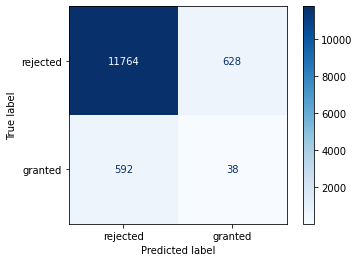

The average f1-micro average is:  0.9063123944094609
The average f1-macro average is:  0.5046725312133965
Fit time:  137.33710527420044
Predict time:  15.192054510116577


In [168]:
optimize_knn_macro = {
    'selector': [0, 5, 10],
    'pca': [5, 10, 20, 30],
    'kNN': [1,2,3,4]
}


big_scores_knn_2 = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'kNN':knn}, 
                               est_values_mapper=optimize_knn_macro, cv=5, scoring='f1_macro')
macros = [(k,v) for k, v in sorted(big_scores_knn_2['macro'].items(), key=lambda item: item[1], reverse=True)]
print(macros)
getResults(big_scores_knn_2, macros, big_test, big_test_labels)

####Multilayer Perceptron

####Support vector machine

###Μετρική απόδοσης f1-micro

####Dummy

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0541s.) Setting batch_size=2.


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0735s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0524s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0639s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0554s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0621s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0552s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0650s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0557s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0764s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0455s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0606s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.7s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1937s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1917s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1840s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    2.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1810s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1855s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1885s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1839s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1803s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1857s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1924s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1740s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.8s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.1s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.4s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


36
[('dummy1', 0.9516203348180003), ('dummy2', 0.9516203348180003), ('dummy3', 0.9516203348180003), ('dummy4', 0.9516203348180003), ('dummy5', 0.9516203348180003), ('dummy6', 0.9516203348180003), ('dummy7', 0.9516203348180003), ('dummy8', 0.9516203348180003), ('dummy9', 0.9516203348180003), ('dummy10', 0.9516203348180003), ('dummy11', 0.9516203348180003), ('dummy12', 0.9516203348180003), ('dummy13', 0.9516203348180003), ('dummy14', 0.9516203348180003), ('dummy15', 0.9516203348180003), ('dummy16', 0.9516203348180003), ('dummy17', 0.9516203348180003), ('dummy18', 0.9516203348180003), ('dummy19', 0.9516203348180003), ('dummy20', 0.9516203348180003), ('dummy21', 0.9516203348180003), ('dummy22', 0.9516203348180003), ('dummy23', 0.9516203348180003), ('dummy24', 0.9516203348180003), ('dummy25', 0.9516203348180003), ('dummy26', 0.9516203348180003), ('dummy27', 0.9516203348180003), ('dummy28', 0.9516203348180003), ('dummy29', 0.9516203348180003), ('dummy30', 0.9516203348180003), ('dummy31', 0.9

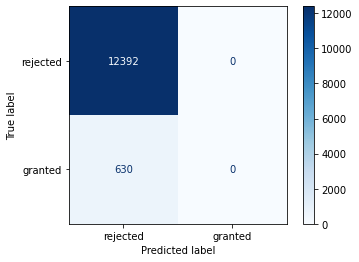

The average f1-micro average is:  0.9516203348180003
The average f1-macro average is:  0.48760525694499096
Fit time:  2.22552227973938
Predict time:  0.0002429485321044922


In [172]:
transformers = {
    'selector': selector,
    'scaler': scaler,
    'min_max_scaler': min_max_scaler,
    'ros': ros,
    'rus': rus,
    'pca': pca
}


big_scores_dummy_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, my_transformers=transformers, my_classifiers={'dummy':dummy}, est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')
micros = [(k,v) for k, v in sorted(big_scores_dummy_micro['micro'].items(), key=lambda item: item[1], reverse=True)]
print(micros)
getResults(big_scores_dummy_micro, micros, big_test, big_test_labels)

####Gaussian Naive Bayes Classifier

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0797s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0756s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0801s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0769s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0778s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0888s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0786s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.1s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1978s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.7s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.3s finished


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.2s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.9s finished


Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 out of   6 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.8s finished


36
[('gnb32', 0.9155275687298418), ('gnb30', 0.07948087851328521), ('gnb34', 0.07948087851328521), ('gnb28', 0.07594839502380586), ('gnb13', 0.0731070496083551), ('gnb14', 0.0731070496083551), ('gnb15', 0.0731070496083551), ('gnb21', 0.0731070496083551), ('gnb22', 0.0731070496083551), ('gnb23', 0.0731070496083551), ('gnb29', 0.0731070496083551), ('gnb33', 0.0731070496083551), ('gnb31', 0.07264629089233604), ('gnb35', 0.07264629089233604), ('gnb16', 0.07241591153432653), ('gnb17', 0.07241591153432653), ('gnb18', 0.07241591153432653), ('gnb24', 0.07241591153432653), ('gnb25', 0.07241591153432653), ('gnb26', 0.07241591153432653), ('gnb36', 0.06919060052219321), ('gnb19', 0.06773153125479957), ('gnb1', 0.06688680694209799), ('gnb2', 0.06688680694209799), ('gnb3', 0.06688680694209799), ('gnb4', 0.06688680694209799), ('gnb5', 0.06688680694209799), ('gnb6', 0.06688680694209799), ('gnb7', 0.06688680694209799), ('gnb8', 0.06688680694209799), ('gnb9', 0.06688680694209799), ('gnb10', 0.0668868069

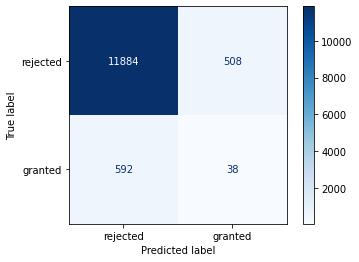

The average f1-micro average is:  0.9155275687298418
The average f1-macro average is:  0.5101961485897237
Fit time:  0.5793001651763916
Predict time:  0.010416984558105469


In [173]:
big_scores_gnb_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'gnb':gnb}, 
                               est_values_mapper=est_values_mapper, cv=5, scoring='f1_micro')
micros = [(k,v) for k, v in sorted(big_scores_gnb_micro['micro'].items(), key=lambda item: item[1], reverse=True)]
print(micros)
getResults(big_scores_gnb_micro, micros, big_test, big_test_labels)

####k_Nearest Neighbors Classifier

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   53.6s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.6s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.0s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.3s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.8s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   50.2s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.4min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.6min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.3s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.2min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.2min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   37.8s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.9min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   18.9s finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.2min finished


Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   14.3s finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.5min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished


Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.3s finished


36
[('kNN13', 0.9516203348180003), ('kNN14', 0.9516203348180003), ('kNN15', 0.9516203348180003), ('kNN16', 0.9516203348180003), ('kNN17', 0.9516203348180003), ('kNN18', 0.9516203348180003), ('kNN21', 0.9516203348180003), ('kNN22', 0.9516203348180003), ('kNN23', 0.9516203348180003), ('kNN24', 0.9516203348180003), ('kNN25', 0.9516203348180003), ('kNN26', 0.9516203348180003), ('kNN1', 0.9515435416986638), ('kNN2', 0.9515435416986638), ('kNN3', 0.9515435416986638), ('kNN4', 0.9515435416986638), ('kNN5', 0.9515435416986638), ('kNN6', 0.9515435416986638), ('kNN7', 0.9515435416986638), ('kNN8', 0.9515435416986638), ('kNN9', 0.9515435416986638), ('kNN10', 0.9515435416986638), ('kNN11', 0.9515435416986638), ('kNN12', 0.9515435416986638), ('kNN29', 0.9096144985409307), ('kNN33', 0.9076178774381816), ('kNN19', 0.9066963600061434), ('kNN27', 0.9066963600061434), ('kNN31', 0.9063123944094609), ('kNN35', 0.9063123944094609), ('kNN30', 0.7342190139763477), ('kNN34', 0.7342190139763477), ('kNN36', 0.7

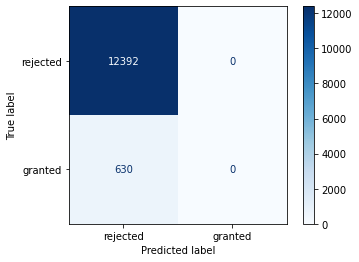

The average f1-micro average is:  0.9516203348180003
The average f1-macro average is:  0.48760525694499096
Fit time:  143.52027654647827
Predict time:  22.727181434631348


In [174]:
optimize_knn_micro = {
    'selector': [0, 5, 10],
    'pca': [5, 10, 20, 30],
    'kNN': [1,2,3,4]
}


big_scores_knn_micro = runEstimators(big_train, big_test, big_train_labels, big_test_labels, 
                               my_transformers=transformers, my_classifiers={'kNN':knn}, 
                               est_values_mapper=optimize_knn_micro, cv=5, scoring='f1_micro')
micros = [(k,v) for k, v in sorted(big_scores_knn_micro['micro'].items(), key=lambda item: item[1], reverse=True)]
print(micros)
getResults(big_scores_knn_micro, micros, big_test, big_test_labels)

####Multilayer Perceptron

####Support vector machine